In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib

In [22]:
path = "C:\\Users\\Vincent\\Github\\spectrometer-mwl\\Spectrogram Data\\"
control_data = pd.read_csv('C:\\Users\\Vincent\\Github\\spectrometer-mwl\\dev\\specter\\Spectrogram Data\\long-test-tube-control.csv', sep=',',header=0)
control_data=control_data.drop(columns='time')

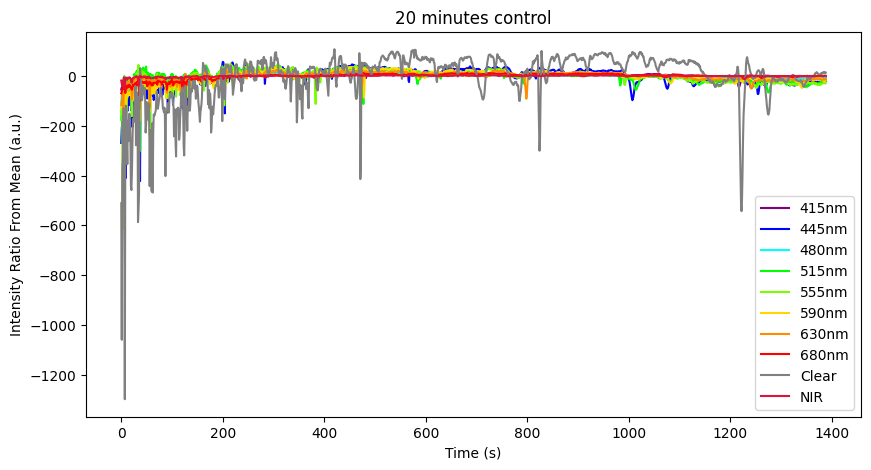

In [23]:
time = data['time'].to_list()
labels = data.columns.to_list()
jdat = data[1:].drop(columns='time').to_numpy().T
col = ['purple','blue','cyan','lime','lawngreen','gold','darkorange','red','gray','crimson']

for i in range(len(jdat)):
    mi = np.mean(jdat[i])
    for j in range(len(jdat[0])):
        jdat[i][j] = jdat[i][j]-mi

fig, ax = plt.subplots(figsize=(10, 5))
for i in range(len(jdat)):
    ax.plot(np.arange(len(jdat[0])), jdat[i], color=col[i], label=labels[i+1])
ax.legend()
plt.xlabel('Time (s)')
plt.ylabel('Intensity Ratio From Mean (a.u.)')
plt.title('20 minutes control')
#plt.ylim(-200,200)
plt.show()
#fig.savefig('control-test-mean-4.png', facecolor=fig.get_facecolor(), edgecolor='none')




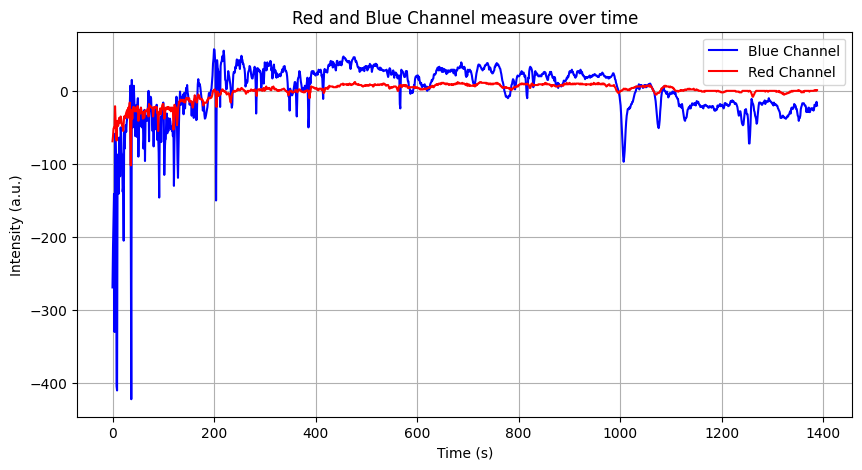

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(np.arange(len(jdat[0])), jdat[1], label='Blue Channel', color='blue')
ax.plot(np.arange(len(jdat[0])), jdat[7], label='Red Channel', color='red')
plt.grid()
plt.legend()
plt.title('Red and Blue Channel measure over time')
plt.xlabel('Time (s)')
plt.ylabel('Intensity (a.u.)')
plt.show()
#fig.savefig('b-vs-r.png', facecolor=fig.get_facecolor(), edgecolor='none')


In [24]:
# Control means by channel
raw_control = []

raw_control.append(pd.read_csv(path+'control-2023-03-29-tube.csv', sep=',',header=0))
raw_control.append(pd.read_csv(path+'control-2-2023-03-29-tube.csv', sep=',',header=0))

paths_list=['control-fast-1.csv', 'blue-fast-1.csv', 'red-fast-1.csv',
            '10-blue-fast-1.csv', '10-red-fast-1.csv',
            '100-blue-fast-1.csv', '100-red-fast-1.csv']


def read_paths_to_list(lista: list[str]):
    return [pd.read_csv(path+file, sep=',',header=0).drop(columns='time') for file in lista]
test1 = read_paths_to_list(paths_list)


def applied_function_to_df(df: pd.DataFrame, c):
    for colum in df:
        colnum = df.columns.get_loc(colum)
        df[colum] = df[colum]/c.iloc[:, colnum].mean()
    return df


def apply_function_to_list_of_dfs(list_df: list[pd.DataFrame], c):
    for df in list_df:
        applied_function_to_df(df, c)
    return list_df

test = apply_function_to_list_of_dfs(test1[1:], test1[0])
control_long =  applied_function_to_df(control_data,control_data)
#  



In [28]:


def division_graphs(df, name='Graph'):
    fig, ax = plt.subplots(figsize=(10, 5))
    lab = df.columns.to_list()
    for i in range(len(df.columns)):
        ax.plot(np.arange(len(df.iloc[:, i])), df.iloc[:, i], color=col[i], label=lab[i])
    ax.legend()
    plt.xlabel('Time (s)')
    plt.ylabel('Intensity Diference From Mean (a.u.)')
    plt.title(name)
    plt.ylim(0.95,1.01)
    plt.show()
    fig.savefig(name+'.png', dpi=600)
col = ['purple','blue','cyan','lime','lawngreen','gold','darkorange','red','gray','crimson']



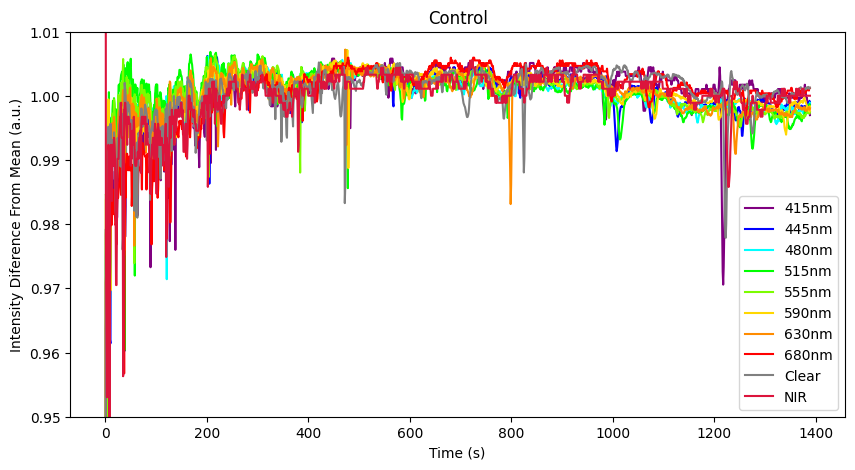

In [29]:
division_graphs(applied_function_to_df(control_data,control_data), 'Control')

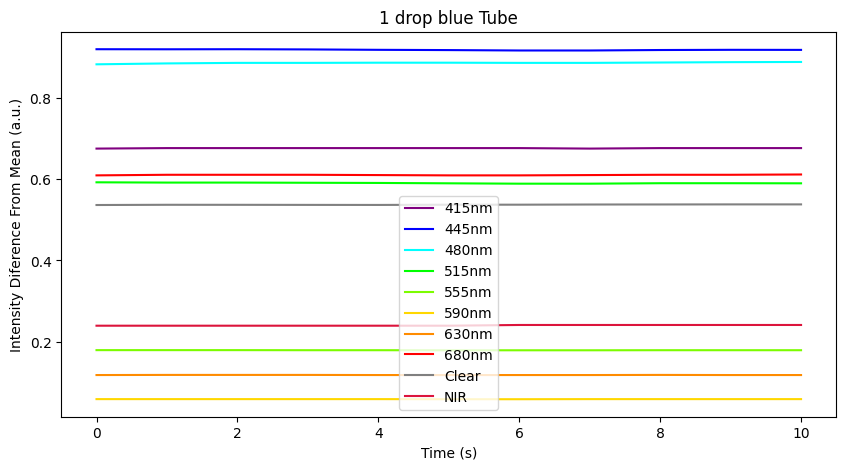

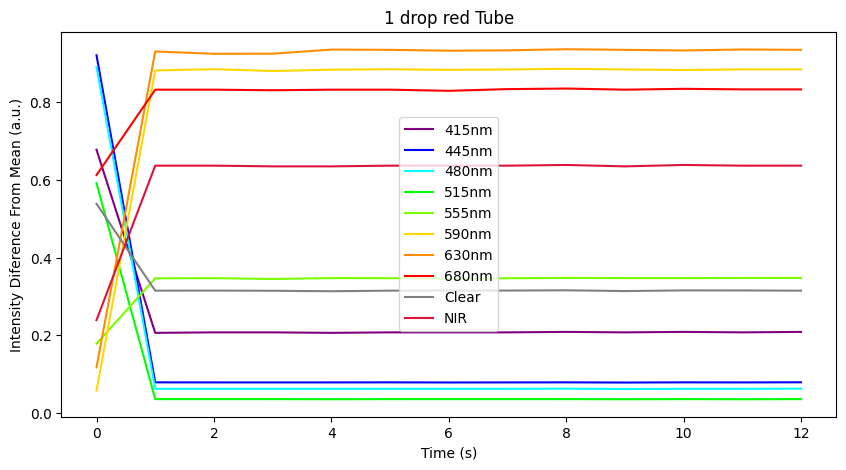

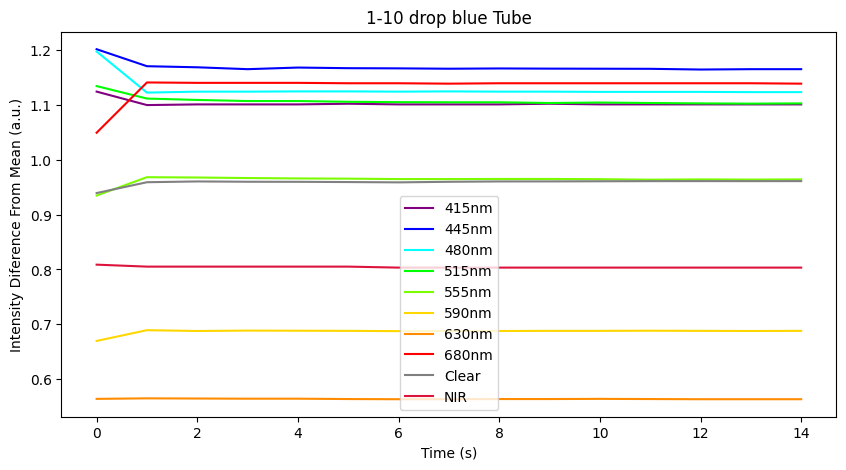

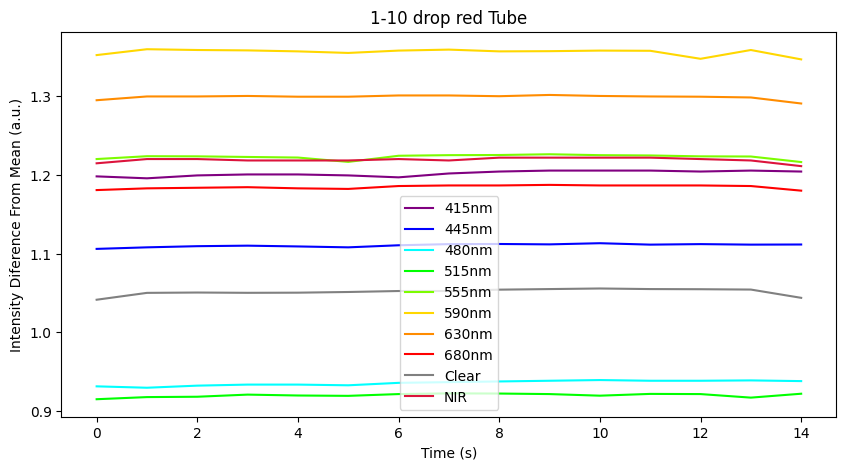

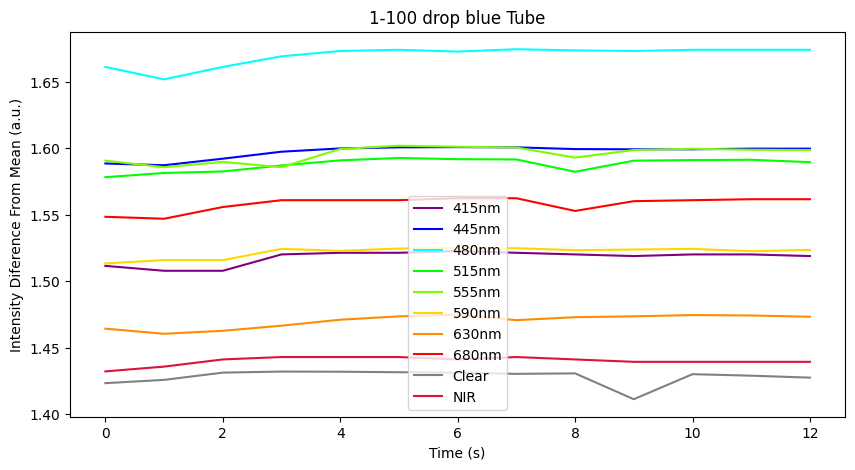

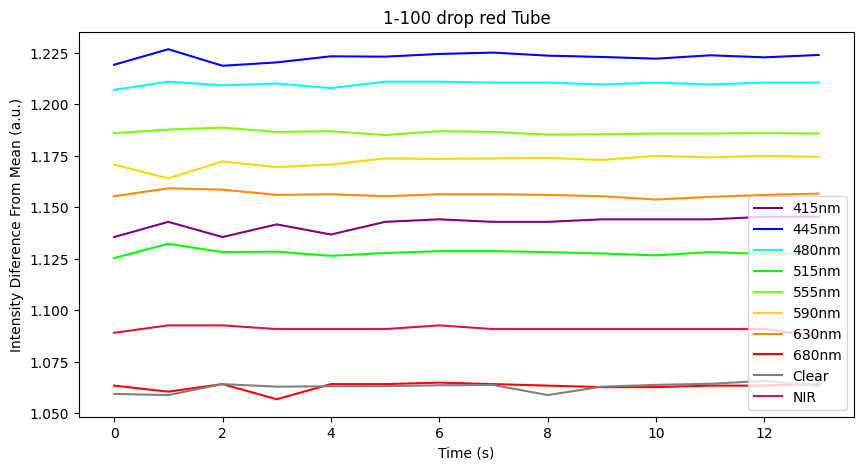

In [22]:
division_graphs(test[0], '1 drop blue Tube')
division_graphs(test[1], '1 drop red Tube')
division_graphs(test[2], '1-10 drop blue Tube')
division_graphs(test[3], '1-10 drop red Tube')
division_graphs(test[4], '1-100 drop blue Tube')
division_graphs(test[5], '1-100 drop red Tube')

